# Homework 5

This homework asks you to perform various experiments with ensemble methods. 

The dataset is the same real estate dataset we previously used from:

https://www.kaggle.com/datasets/mirbektoktogaraev/madrid-real-estate-market

You will write code and discussion into code and text cells in this notebook. 

If a code block starts with TODO:, this means that you need to write something there. 

There are also markdown blocks with questions. Write the answers to these questions in the specified locations.

Some code had been written for you to guide the project. Don't change the already written code.

## Grading
The points add up to 10. Extensive partial credit will be offered. Thus, make sure that you are at least attempting all problems. 

Make sure to comment your code, such that the grader can understand what different components are doing or attempting to do. 

In [41]:
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import sklearn.ensemble
import seaborn as sns

# A. Setup. 

In this project we are going to work in a multi-variable setting. 

This time, there are 7 explanatory variables: ``sq_mt_built``, ``n_rooms``, ``n_bathrooms``, ``is_renewal_needed``, ``is_new_development`` and ``has_fitted_wardrobes``. 

We will first create the training and test data while doing some minimal data cleaning.

In [14]:
df = pd.read_csv("kc_house_data.csv")
#print(f"The columns of the database {df.columns}")

xfields = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot",
           "floors", "waterfront", "view", "condition", "grade", "sqft_above", "sqft_basement",
           "yr_built", "yr_renovated", "zipcode", "lat", "long", "sqft_living15", "sqft_lot15"]
yfield = ["price"]
# print (xfields + yfield)
dfsel = df[xfields + yfield]
dfselnona = dfsel.dropna()
df_shuffled = dfselnona.sample(frac=1) # shuffle the rows
x = df_shuffled[xfields].to_numpy(dtype=np.float64)
y = df_shuffled[yfield].to_numpy(dtype=np.float64)
print(x.shape)
training_data_x = x[:8000]
training_data_y = y[:8000]
test_data_x = x[8000:]
test_data_y = y[8000:]
print(f"Training data is composed of {len(training_data_x)} samples.")
print(f"Test data is composed of {len(test_data_x)} samples.")
# print(test_data_x[45])

(21613, 18)
Training data is composed of 8000 samples.
Test data is composed of 13613 samples.


# B. Creating a linear regression multi-variable baseline. 

In this section we make a linear regression predictor for the multi-variable case. We also check the performance of the resulting regressor, and print the error. 

This part is had been done for you, such that the work does not depend on you importing parts from the previous projects. 

You will need to adapt this for the other models. 

In [9]:
# training the linear regressor
regressor = sklearn.linear_model.LinearRegression()
regressor.fit(training_data_x, training_data_y)
# We will create the predictions yhat for every x from the training data. We will do this one at a time. This is not an efficient way to do it, but it allows you to write and debug functions that return a scalar number
yhats = []
for x in test_data_x:
    yhat = regressor.predict([x])
    yhats.append(yhat[0])

# Now, print some examples of the quality of the classifier
examples = [45, 67, 170, 189, 207]
for i in examples:
    x = test_data_x[i]
    y = test_data_y[i]
    yhat = regressor.predict([x])[0][0]
    print(f"House {i} with {x[0]} sqmt was sold for {y} euros, but our system predicted {yhat:.2f}")

# Now calculate the root mean square error on the resulting arrays
error = sklearn.metrics.mean_squared_error(yhats, test_data_y, squared=False)
print(f"The mean square error of the linear regression is {error:.2f} euro")

House 45 with 5.0 sqmt was sold for [530000.] euros, but our system predicted 574123.99
House 67 with 3.0 sqmt was sold for [550000.] euros, but our system predicted 626686.82
House 170 with 5.0 sqmt was sold for [565000.] euros, but our system predicted 587397.54
House 189 with 4.0 sqmt was sold for [510000.] euros, but our system predicted 595798.64
House 207 with 2.0 sqmt was sold for [369950.] euros, but our system predicted 435602.24
The mean square error of the linear regression is 212636.03 euro


In [39]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()
linear_regressor.fit(training_data_x, training_data_y)

# Coefficients and intercept
coefficients = linear_regressor.coef_[0]
intercept = linear_regressor.intercept_[0]

# Print the linear regression formula
formula = f"Price = {intercept:.2f} + "
for feature, coefficient in zip(xfields, coefficients):
    formula += f"{coefficient:.2f}*{feature} + "

print(formula[:-2])  # Remove the trailing '+' and space

Price = -56436163.01 + -43216.64*bedrooms + 44169.29*bathrooms + 147.73*sqft_living + 0.38*sqft_lot + 30599.20*floors + 83.35*sqft_above + 64.38*sqft_basement + -2254.49*yr_built + 44.54*yr_renovated + 615310.38*lat + -257394.42*long + 116.38*sqft_living15 + -0.58*sqft_lot15 


<AxesSubplot:xlabel='yr_built', ylabel='price'>

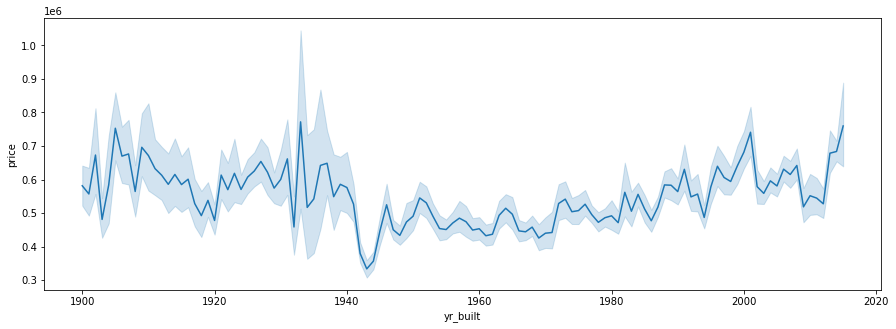

In [42]:
plt.figure(figsize=(15,5))
sns.lineplot(x='yr_built', y='price', data=df)

[Text(0.5, 0, 'Sqft_living'),
 Text(0, 0.5, 'Price'),
 Text(0.5, 1.0, 'Price vs Sqft Living')]

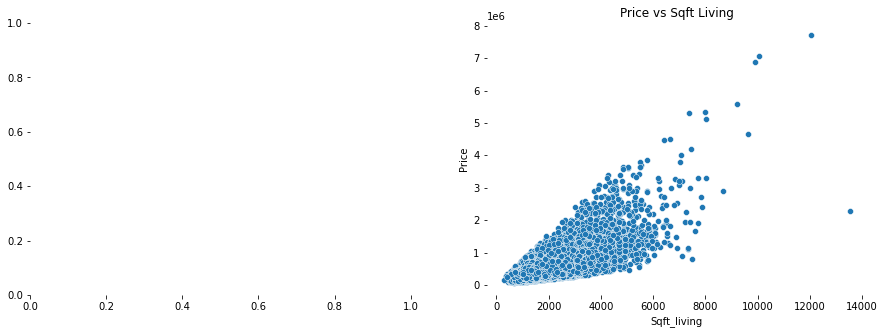

In [45]:
f, axes = plt.subplots(1, 2,figsize=(15,5))
sns.scatterplot(x='sqft_living',y='price', data=df, ax=axes[1])
sns.despine(bottom=True, left=True)
axes[1].set(xlabel='Sqft_living', ylabel='Price', title='Price vs Sqft Living')


In [49]:
importances = regressor.feature_importances_

# Create a DataFrame for better visualization
importance_df = pd.DataFrame({'Feature': xfields, 'Importance': importances})

# Sort the DataFrame by Importance in descending order
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Importance of each Feature:")

# Print the sorted feature importances
for index, row in importance_df.iterrows():
    print(f"{row['Feature']}: {row['Importance']:.4f}")

Importance of each Feature:
sqft_living: 0.5272
lat: 0.1937
long: 0.0853
sqft_living15: 0.0615
sqft_above: 0.0299
yr_built: 0.0234
sqft_lot15: 0.0222
sqft_lot: 0.0218
sqft_basement: 0.0104
bathrooms: 0.0094
bedrooms: 0.0064
yr_renovated: 0.0052
floors: 0.0037


# P1: Random Forest using sklearn (5 points)

Use the RandomForestRegressor function from sklearn to predict the prices of the house. Print the resulting error and samples, similar to the way in Section B. 

Experiment with the settings of the hyperparameters: n_estimators (try at least values 10, 25, 100, 200) and max_depth (try at least values 1, 2, 4, 8, 16 and None).

Retain the hyperparameter value that gives you the best result. 



In [38]:
import pandas as pd
import numpy as np
import sklearn.metrics
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("kc_house_data.csv")

# Define the features and target variable
xfields = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot",
           "floors", "sqft_above", "sqft_basement",
           "yr_built", "yr_renovated", "lat", "long", "sqft_living15", "sqft_lot15"]
yfield = ["price"]

# Select relevant columns and handle missing values
dfsel = df[xfields + yfield].dropna()

# Shuffle the data
df_shuffled = dfsel.sample(frac=1)

# Convert to NumPy arrays
x = df_shuffled[xfields].to_numpy(dtype=np.float64)
y = df_shuffled[yfield].to_numpy(dtype=np.float64)

# Split the data into training and test sets
training_data_x = x[:8000]
training_data_y = y[:8000]
test_data_x = x[8000:]
test_data_y = y[8000:]

# Handle missing values in the target variable
test_data_x = test_data_x[~np.isnan(test_data_y).reshape(-1)]
test_data_y = test_data_y[~np.isnan(test_data_y)]

# Hyperparameter tuning
error = float('inf')
best_params = None

for n_estimators in [50, 100, 150, 200, 250]:
    for max_depth in [None, 10, 20, 30, 40]:
        regressor = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42)
        regressor.fit(training_data_x, training_data_y.ravel())

        # Predictions + error calculation
        yhats_rf = regressor.predict(test_data_x)
        error_rf = sklearn.metrics.mean_squared_error(yhats_rf, test_data_y, squared=False)

        # Print some examples of the quality of the classifier
        num_examples = 10
        examples_rf = np.random.choice(len(test_data_y), num_examples, replace=False)
        print(f"Iteration: n_estimators={n_estimators}, max_depth={max_depth}, error={error_rf:.2f} dollars")
        for i in examples_rf:
            x_rf = test_data_x[i]
            y_rf = test_data_y[i]
            yhat_rf = regressor.predict([x_rf])[0]
            print(f"House {i} built in {x_rf[7]} was sold for {y_rf} dollars, but our system predicted {yhat_rf:.2f}")

        # Compare and print result
        if error_rf < error:
            error = error_rf
            best_params = {'The n_estimators is': n_estimators, 'The max_depth is': max_depth}

print(f"\nThe best hyperparameter value is {best_params}")


Iteration: n_estimators=50, max_depth=None, error=162501.84 dollars
House 4577 built in 1978.0 was sold for 490000.0 dollars, but our system predicted 461581.24
House 1126 built in 1963.0 was sold for 1517000.0 dollars, but our system predicted 901023.66
House 12046 built in 1968.0 was sold for 500000.0 dollars, but our system predicted 537672.42
House 6874 built in 1977.0 was sold for 449950.0 dollars, but our system predicted 526253.00
House 2213 built in 1910.0 was sold for 438600.0 dollars, but our system predicted 361810.00
House 4783 built in 2001.0 was sold for 1099880.0 dollars, but our system predicted 1261929.20
House 7245 built in 1947.0 was sold for 775000.0 dollars, but our system predicted 867918.00
House 4261 built in 1960.0 was sold for 199000.0 dollars, but our system predicted 219076.00
House 11738 built in 1950.0 was sold for 1989000.0 dollars, but our system predicted 1564150.00
House 12526 built in 1955.0 was sold for 453000.0 dollars, but our system predicted 4057

# Questions: 
* Q: Do you find that Random Forest performs better than the previous approaches you implemented? Discuss. 
* A: << Overall, the Random Forest definitely performs better than the Linear Regression approach because it has a lower MSE and is overall more effective in analyzing the given dataset >>
* Q: Explain the impact of the number of estimators and max tree depth hyperparameters on the accuracy. Which hyperparameter setting gives you the best value? Is this the same as the default settings in sklearn?
* A: << The accuracy generally gets lower as the hyperparameters increase, this is genrally because a higher depth of the tree indicates that the tree is very complex. The default settings in sklearn need more training and experimentation for it to provide the best value.  >>
* Q: Explain the impact of the hyperparameters on the training time. 
* A: << Both the number of estimators and max tree depth have a positive correlation on the tranining time because it indicates that there is more of the tree that needs to be trained since its bigger. >>


# P2: AdaBoost using sklearn (5 points)

Use the AdaBoost function from sklearn to predict the prices of the house. Print the resulting error and samples, similar to the way in Section B. 

Experiment with the settings of the hyperparameters: loss (try "linear", "square" and "exponential) and learning_rate (try at least values 0.2, 0.5, 1 and 2)

C:\Users\maria\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:993: RuntimeWarning: invalid value encountered in true_divide
  y_hat /= len(self.estimators_)
C:\Users\maria\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:993: RuntimeWarning: invalid value encountered in true_divide
  y_hat /= len(self.estimators_)
C:\Users\maria\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:993: RuntimeWarning: invalid value encountered in true_divide
  y_hat /= len(self.estimators_)
C:\Users\maria\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:993: RuntimeWarning: invalid value encountered in true_divide
  y_hat /= len(self.estimators_)
C:\Users\maria\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:993: RuntimeWarning: invalid value encountered in true_divide
  y_hat /= len(self.estimators_)


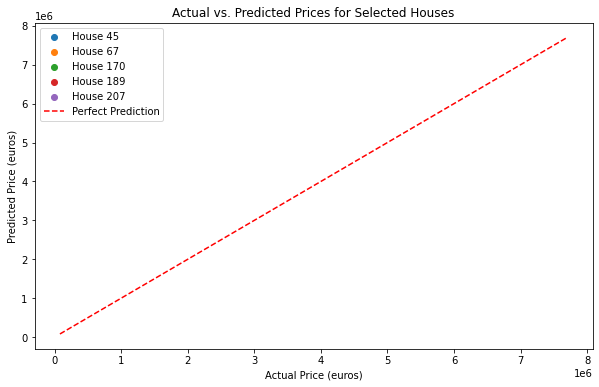


The best hyperparameter value is {'The n_estimators is': 100, 'The max_depth is': 16}


# Questions: 
* Q: Do you find that Adaboost performs better than the previous approaches you implemented? Discuss. 
* A: << Just like Random Forrest, the Adaboost also performs better than the linar regression because it has a lower MSE which indicates it is more effective. >>
* Q: Explain the impact of the loss and the learning_rate hyperparameters on the accuracy. Which hyperparameter setting gives you the best value? Is this the same as the default settings in sklearn?
* A: << They both decrease the accuracy as they increase. This is because they make it more complex, which leads to a higher MSE overall. >>
* Q: Explain the impact of the hyperparameters on the training time. 
* A: << Hyperparameters have a positive correlation on the tranining time because it indicates that there is more of the tree that needs to be trained since its bigger >>